In [3]:
#pip install py3-pinterest

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
from py3pin.Pinterest import Pinterest

In [3]:
email = 'zajac.steve.26@gmail.com'
password = ''
username = 'yungsven'

pin = Pinterest(email=email,
              password=password,
              username=username,
              cred_root='cred_root')
pin.login()

[WDM] - ====== WebDriver manager ======
[WDM] - Current google-chrome version is 89.0.4389
[WDM] - Get LATEST driver version for 89.0.4389


No credentials stored [Errno 2] No such file or directory: 'cred_root/zajac.steve.26@gmail.com'




[WDM] - Driver [/Users/Main/.wdm/drivers/chromedriver/mac64/89.0.4389.23/chromedriver] found in cache


Failed to login Message: 

Successfully logged in with account zajac.steve.26@gmail.com


In [4]:
#Acess all the boards
all_boards = Pinterest.boards_all(pin,username='ohjoy')

In [5]:
#Need to get board ids

board_ids = []

for i in range(len(all_boards)):
    board_id = all_boards[i]['id']
    board_ids.append(str(board_id))


In [7]:
pin_list = []

for b_id in board_ids:
    le_pin = pin.board_feed(board_id=b_id)
    pin_list.append(le_pin)


In [8]:
import pandas as pd 
df = pd.DataFrame(columns = ['board_num',
                             'board_name',
                             'pin_num', 
                             'description'])
empty_df = df.copy()
for b_index in range(len(board_ids)):
    for pin_index in range((len(pin_list[b_index])-1)): 
        #starts at 1 and ends -1 from end because first is different info and last is the suggestion
        temp_df = empty_df.copy()
        temp_df = pd.concat(
            [temp_df, pd.DataFrame(
                data={'board_num' : [board_ids[b_index]], 
                      'board_name' : [pin_list[b_index][pin_index]['board']['name']], 
                      'pin_num' : [pin_list[b_index][pin_index]['id']], 
                      'description' : [pin_list[b_index][pin_index]['description']]})])
        df = df.append(temp_df, ignore_index=True)

In [40]:
# df.to_csv('../4-9-clustering-project-main/ohjoypins.csv',index=False)
df

,board_num,board_name,pin_num,description
0,21181129436808479,Pets,21181060737501522,Pink Elephant Onesie– Little Beast
1,21181129436808479,Pets,21181060737450032,Dog Leash Isabel Pink Yellow Handmade Leather ...
2,21181129436808479,Pets,21181060737450029,Dog Knit Feather Christian Cowan and maxbone J...
3,21181129436808479,Pets,21181060737450028,Dog Knit Feather Christian Cowan and maxbone J...
4,21181129436808479,Pets,21181060737421438,"While you’re bundling up, remember to keep you..."
...,...,...,...,...
10912,21181129436631398,Mini Bites,21181060734534261,
10913,21181129436631398,Mini Bites,21181060734284947,DIY Bunny Ear Ice Cream Cones | via Studio DIY
10914,21181129436631398,Mini Bites,21181060732831293,We’ve partnered with Popsicle to share an easy...
10915,21181129436631398,Mini Bites,21181060727198274,20 Easy After-School Snacks Your Kids Will Go ...


In [ ]:
######################################################

In [159]:
df = pd.read_csv('../4-9-clustering-project-main/ohjoypins.csv')
df

,board_num,board_name,pin_num,description
0,21181129436808479,Pets,21181060737501522,Pink Elephant Onesie– Little Beast
1,21181129436808479,Pets,21181060737450032,Dog Leash Isabel Pink Yellow Handmade Leather ...
2,21181129436808479,Pets,21181060737450029,Dog Knit Feather Christian Cowan and maxbone J...
3,21181129436808479,Pets,21181060737450028,Dog Knit Feather Christian Cowan and maxbone J...
4,21181129436808479,Pets,21181060737421438,"While you’re bundling up, remember to keep you..."
...,...,...,...,...
10912,21181129436631398,Mini Bites,21181060734534261,
10913,21181129436631398,Mini Bites,21181060734284947,DIY Bunny Ear Ice Cream Cones | via Studio DIY
10914,21181129436631398,Mini Bites,21181060732831293,We’ve partnered with Popsicle to share an easy...
10915,21181129436631398,Mini Bites,21181060727198274,20 Easy After-School Snacks Your Kids Will Go ...


In [ ]:
#### PLOT WITH OG BOARDS ####

In [68]:
# Preprocessing
from sklearn.feature_extraction.text import TfidfVectorizer
#remove empty pin descriptions
df_clean = df.drop(df.description[df['description'] == ''].index, axis=0)
# remove frequent words (max_df=0.95) and very rare words that only show up like once (min_df=2)
tfidf = TfidfVectorizer(max_df=0.95, min_df=2, stop_words='english')
dtm = tfidf.fit_transform(df_clean.description)


# lets try TSNE on this data
# fit transform the TSNE model
import time
from sklearn.manifold import TSNE
time_start = time.time()
tsne = TSNE(n_components=2, verbose=1, perplexity=40, n_iter=300)
tsne_results = tsne.fit_transform(dtm)
print('t-SNE done! Time elapsed: {} seconds'.format(time.time()-time_start))

[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 10917 samples in 0.001s...
[t-SNE] Computed neighbors for 10917 samples in 2.688s...
[t-SNE] Computed conditional probabilities for sample 1000 / 10917
[t-SNE] Computed conditional probabilities for sample 2000 / 10917
[t-SNE] Computed conditional probabilities for sample 3000 / 10917
[t-SNE] Computed conditional probabilities for sample 4000 / 10917
[t-SNE] Computed conditional probabilities for sample 5000 / 10917
[t-SNE] Computed conditional probabilities for sample 6000 / 10917
[t-SNE] Computed conditional probabilities for sample 7000 / 10917
[t-SNE] Computed conditional probabilities for sample 8000 / 10917
[t-SNE] Computed conditional probabilities for sample 9000 / 10917
[t-SNE] Computed conditional probabilities for sample 10000 / 10917
[t-SNE] Computed conditional probabilities for sample 10917 / 10917
[t-SNE] Mean sigma: 0.000000
[t-SNE] KL divergence after 250 iterations with early exaggeration: 86.667435
[t-SNE] KL

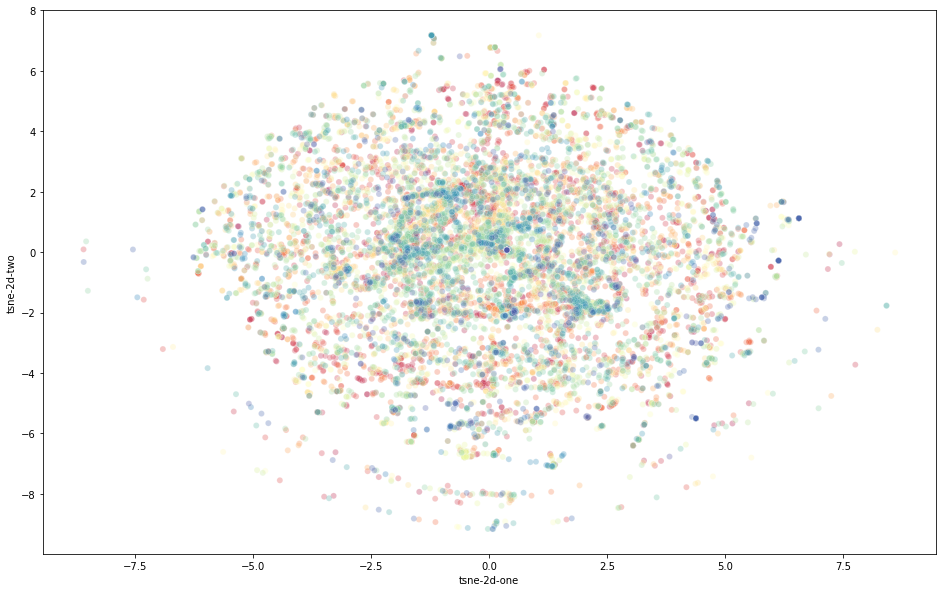

In [80]:
# plot it
import matplotlib.pyplot as plt 
import seaborn as sns
df_subset = df_clean.copy()
df_subset['tsne-2d-one'] = tsne_results[:,0]
df_subset['tsne-2d-two'] = tsne_results[:,1]
plt.figure(figsize=(16,10)) #.gca(projection=‘3d’)
sns.scatterplot(
    x='tsne-2d-one', y='tsne-2d-two',
    hue=df_clean.board_name, # clusters from the topics we got from NMF 
    palette='Spectral',
    data=df_subset,
    legend=False,
    alpha=0.3,
    
)

In [ ]:
##### NMF #####

In [153]:
# Preprocessing
from sklearn.feature_extraction.text import TfidfVectorizer
# remove frequent words (max_df=0.95) and very rare words that only show up like once (min_df=2)
tfidf = TfidfVectorizer(max_df=0.95, min_df=2, stop_words='english')
dtm = tfidf.fit_transform(df.description)
# NMF
from sklearn.decomposition import NMF
# n_components is the arbitrary number of expected topics
nmf_model = NMF(n_components=68,random_state=42)
nmf_model.fit(dtm)
# Get top words by components (topics)
for index,topic in enumerate(nmf_model.components_):
    print(f'THE TOP 15 WORDS FOR TOPIC #{index}')
    print([tfidf.get_feature_names()[i] for i in topic.argsort()[-15:]])
    print('\n')
# Reasign topics to the dataset
topic_results = nmf_model.transform(dtm)
df['Topic2'] = topic_results.argmax(axis=1)
# each topic is just based on what the top 15 words were from above
#mytopic_dict2 = {0:'quilt',1:'home design',2:'royalty',3:'funny',4:'octopus',5:'diy',6:'remodeling',
                 #7:'books',8:'recipes',9:'arts',10:'bedroom decor',11:'yard'}

#df['Topic2'] = df['Topic2'].map(mytopic_dict2)
df.head(10)

THE TOP 15 WORDS FOR TOPIC #0
['team', 'okay', 'ohjoybuildsahouse', 'valentine', 'calpak', 'mixbook', 'petco', 'cho', 'guide', 'builds', 'adventures', 'wears', 'target', 'oh', 'joy']


THE TOP 15 WORDS FOR TOPIC #1
['spooky', 'peach', 'sfgirlbybay', 'door', 'nursery', 'light', 'hot', 'coat', 'pale', 'halloween', 'blue', 'walls', 'orange', 'red', 'pink']


THE TOP 15 WORDS FOR TOPIC #2
['ribbon', '25', 'box', 'giftwrapping', 'bow', 'topper', 'present', 'great', '50', 'toppers', 'giftwrap', 'wrapping', 'guide', 'wrap', 'gift']


THE TOP 15 WORDS FOR TOPIC #3
['blog', 'australian', 'works', 'reach', 'trends', 'poster', 'files', 'tiles', 'bar', 'restaurant', 'sponge', 'architecture', 'graphic', 'interior', 'design']


THE TOP 15 WORDS FOR TOPIC #4
['ceramic', 'couch', 'moon', 'charlotte', 'idea', 'trend', 'mural', 'tie', 'motivational', 'shopping', 'leather', 'live', 'cats', 'drawn', 'love']


THE TOP 15 WORDS FOR TOPIC #5
['peach', 'posts', 'vidéos', 'flickr', 'interiors', 'roandcostudio'

['roxanne', 'balloon', 'assoulin', 'sequin', 'float', 'etsy', 'nails', 'band', 'skirt', 'stripe', 'pool', 'garden', 'mini', 'nursery', 'rainbow']


THE TOP 15 WORDS FOR TOPIC #46
['donuts', 'nice', 'valentine', 'untitled', 'shaped', 'valentines', 'sweater', 'butter', 'pop', 'set', 'red', 'lovely', 'card', 'pillow', 'heart']


THE TOP 15 WORDS FOR TOPIC #47
['models', '2018', 'looks', 'collection', '2016', 'runway', '2020', 'fashion', '2019', 'beauty', 'vogue', 'ready', 'summer', 'wear', 'spring']


THE TOP 15 WORDS FOR TOPIC #48
['fabric', 'striped', 'jewelry', 'beaded', 'crew', 'shapes', 'ban', 'babe', 'zebra', 'spade', 'sarah', 'kate', 'rope', 'pastel', 'necklace']


THE TOP 15 WORDS FOR TOPIC #49
['dot', 'polka', 'bath', 'bubble', 'today', 'sweet', 'wild', 'cookies', 'lovely', 'dried', 'flower', 'vase', 'library', 'bouquet', 'flowers']


THE TOP 15 WORDS FOR TOPIC #50
['brazil', 'space', 'shapes', 'florals', 'making', 'envelope', 'patterns', 'wild', 'united', 'die', 'bright', 'summe

,board_num,board_name,pin_num,description,Topic2
0,21181129436808479,Pets,21181060737501522,Pink Elephant Onesie– Little Beast,64
1,21181129436808479,Pets,21181060737450032,Dog Leash Isabel Pink Yellow Handmade Leather ...,52
2,21181129436808479,Pets,21181060737450029,Dog Knit Feather Christian Cowan and maxbone J...,61
3,21181129436808479,Pets,21181060737450028,Dog Knit Feather Christian Cowan and maxbone J...,61
4,21181129436808479,Pets,21181060737421438,"While you’re bundling up, remember to keep you...",61
5,21181129436808479,Pets,21181060737402957,The Basic Concept | Fortune Cookie Nose-work T...,41
6,21181129436808479,Pets,21181060737402228,Boba Tag | TRILL PAWS - Pet tag,61
7,21181129436808479,Pets,21181060737393744,Spearmint Climbing Rope Dog Leash – The Foggy Dog,61
8,21181129436808479,Pets,21181060737384733,Modern dog and cat house with acrylic door Pet...,15
9,21181129436808479,Pets,21181060737384718,Porvoo Medium Pet House | Crate and Barrel,15


In [160]:
from sklearn.decomposition import NMF
# n_components is the arbitrary number of expected topics
nmf_model = NMF(n_components=11,random_state=42)
nmf_model.fit(dtm)
# Reasign topics to the dataset
topic_results = nmf_model.transform(dtm)
df['Topic2'] = topic_results.argmax(axis=1)
mytopic_dict2 = {0:'misc',1:'colours',2:'christmas gifts',
                 3:'interior design',4:'art',5:'photos',6:'insta', 
                 7:'outfits', 8:'wedding', 9:'wall art', 10:'diy party'}
df['Topic2'] = df['Topic2'].map(mytopic_dict2)
df.tail(10)

,board_num,board_name,pin_num,description,Topic2
10907,21181129436631398,Mini Bites,21181060735142852,Here’s my “Mom Win” of the Week (because I’ll ...,outfits
10908,21181129436631398,Mini Bites,21181060735142354,lovin' the lizards...,outfits
10909,21181129436631398,Mini Bites,21181060735003925,Brushstroke Ghost Halloween Cake,diy party
10910,21181129436631398,Mini Bites,21181060734998434,"In a vibrant lacquer finish, the Takenaka bent...",interior design
10911,21181129436631398,Mini Bites,21181060734998411,Takenaka Cube Bento Box,christmas gifts
10912,21181129436631398,Mini Bites,21181060734534261,,misc
10913,21181129436631398,Mini Bites,21181060734284947,DIY Bunny Ear Ice Cream Cones | via Studio DIY,diy party
10914,21181129436631398,Mini Bites,21181060732831293,We’ve partnered with Popsicle to share an easy...,diy party
10915,21181129436631398,Mini Bites,21181060727198274,20 Easy After-School Snacks Your Kids Will Go ...,diy party
10916,21181129436631398,Mini Bites,21181060725796246,3-ingredient snack recipes: Peanut butter and ...,diy party


In [161]:
df

,board_num,board_name,pin_num,description,Topic2
0,21181129436808479,Pets,21181060737501522,Pink Elephant Onesie– Little Beast,colours
1,21181129436808479,Pets,21181060737450032,Dog Leash Isabel Pink Yellow Handmade Leather ...,colours
2,21181129436808479,Pets,21181060737450029,Dog Knit Feather Christian Cowan and maxbone J...,wedding
3,21181129436808479,Pets,21181060737450028,Dog Knit Feather Christian Cowan and maxbone J...,wedding
4,21181129436808479,Pets,21181060737421438,"While you’re bundling up, remember to keep you...",diy party
...,...,...,...,...,...
10912,21181129436631398,Mini Bites,21181060734534261,,misc
10913,21181129436631398,Mini Bites,21181060734284947,DIY Bunny Ear Ice Cream Cones | via Studio DIY,diy party
10914,21181129436631398,Mini Bites,21181060732831293,We’ve partnered with Popsicle to share an easy...,diy party
10915,21181129436631398,Mini Bites,21181060727198274,20 Easy After-School Snacks Your Kids Will Go ...,diy party


In [ ]:
######TOPIC 2 PLOT#####

In [74]:
# Preprocessing
from sklearn.feature_extraction.text import TfidfVectorizer
#remove empty pin descriptions
df_clean = df.drop(df.description[df['description'] == ''].index, axis=0)
# remove frequent words (max_df=0.95) and very rare words that only show up like once (min_df=2)
tfidf = TfidfVectorizer(max_df=0.95, min_df=2, stop_words='english')
dtm = tfidf.fit_transform(df_clean.description)


# lets try TSNE on this data
# fit transform the TSNE model
import time
from sklearn.manifold import TSNE
time_start = time.time()
tsne = TSNE(n_components=2, verbose=1, perplexity=40, n_iter=300)
tsne_results = tsne.fit_transform(dtm)
print('t-SNE done! Time elapsed: {} seconds'.format(time.time()-time_start))

[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 10917 samples in 0.001s...
[t-SNE] Computed neighbors for 10917 samples in 2.670s...
[t-SNE] Computed conditional probabilities for sample 1000 / 10917
[t-SNE] Computed conditional probabilities for sample 2000 / 10917
[t-SNE] Computed conditional probabilities for sample 3000 / 10917
[t-SNE] Computed conditional probabilities for sample 4000 / 10917
[t-SNE] Computed conditional probabilities for sample 5000 / 10917
[t-SNE] Computed conditional probabilities for sample 6000 / 10917
[t-SNE] Computed conditional probabilities for sample 7000 / 10917
[t-SNE] Computed conditional probabilities for sample 8000 / 10917
[t-SNE] Computed conditional probabilities for sample 9000 / 10917
[t-SNE] Computed conditional probabilities for sample 10000 / 10917
[t-SNE] Computed conditional probabilities for sample 10917 / 10917
[t-SNE] Mean sigma: 0.000000
[t-SNE] KL divergence after 250 iterations with early exaggeration: 87.249748
[t-SNE] KL

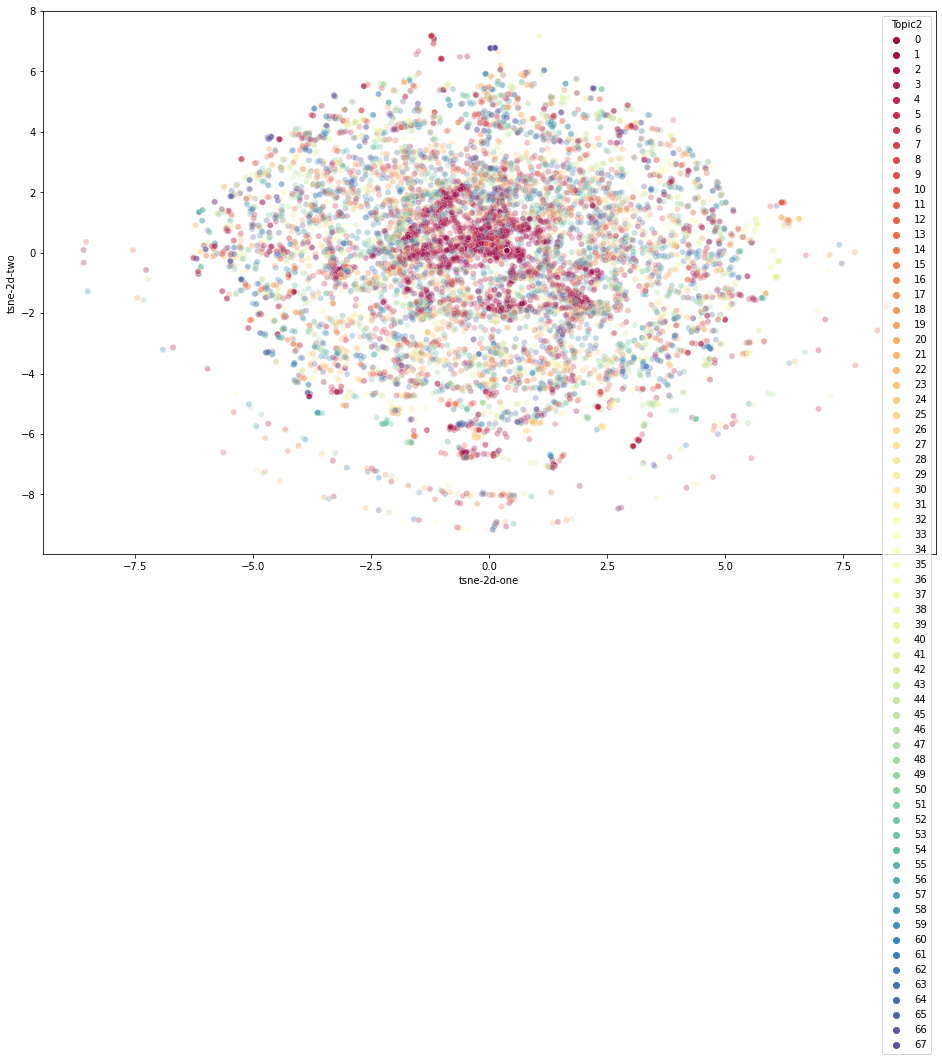

In [79]:
# plot it
import matplotlib.pyplot as plt 
import seaborn as sns
df_subset = df_clean.copy()
df_subset['tsne-2d-one'] = tsne_results[:,0]
df_subset['tsne-2d-two'] = tsne_results[:,1]
plt.figure(figsize=(16,10)) #.gca(projection=‘3d’)
sns.scatterplot(
    x='tsne-2d-one', y='tsne-2d-two',
    hue=df_clean.Topic2, # clusters from the topics we got from NMF 
    palette='Spectral',
    data=df_subset,
    legend='full',
    alpha=0.3,   
)


In [ ]:
### PCA ###

In [162]:
# Preprocessing
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import PCA
#remove empty pin descriptions
df_clean = df.drop(df.description[df['description'] == ''].index, axis=0)
# remove frequent words (max_df=0.95) and very rare words that only show up like once (min_df=2)
tfidf = TfidfVectorizer(max_df=0.95, min_df=2, stop_words='english')
dtm = tfidf.fit_transform(df_clean.description)
# lets try TSNE on this data
# fit transform the TSNE model
pca = PCA(n_components=3)
pca_result = pca.fit_transform(dtm.todense())
df_clean['pca-one'] = pca_result[:,0]
df_clean['pca-two'] = pca_result[:,1] 
df_clean['pca-three'] = pca_result[:,2]
print('Explained variation per principal component: {}'.format(pca.explained_variance_ratio_))

Explained variation per principal component: [0.01287882 0.00433256 0.00407705]


In [ ]:
### OG BOARD NAME ###

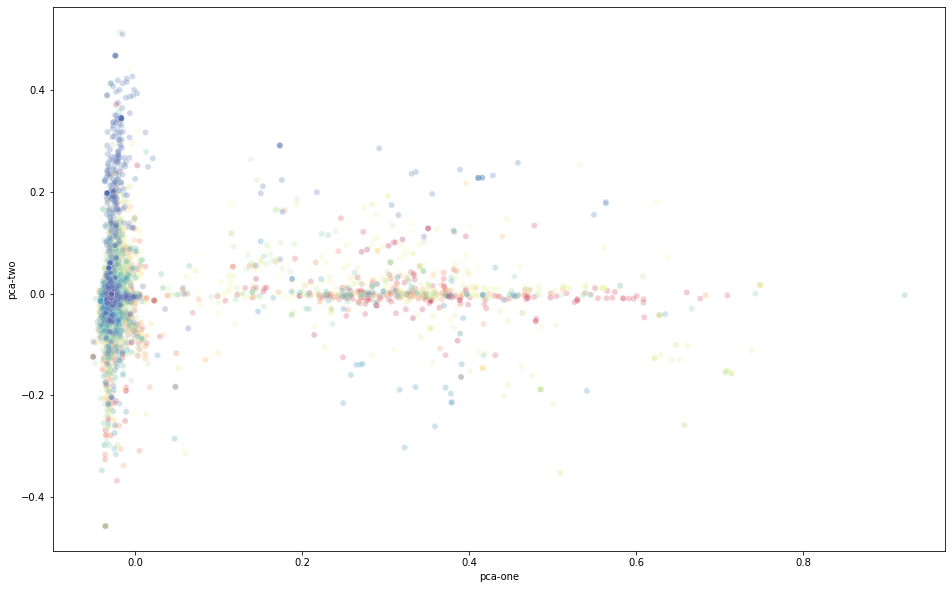

In [163]:
plt.figure(figsize=(16,10))
sns.scatterplot(
    x="pca-one", y="pca-two", hue=df_clean.board_name,
    data=df_clean,
    legend=False,
    alpha=0.25,
    palette='Spectral'
    
)

In [87]:
### TOPIC 2 ###

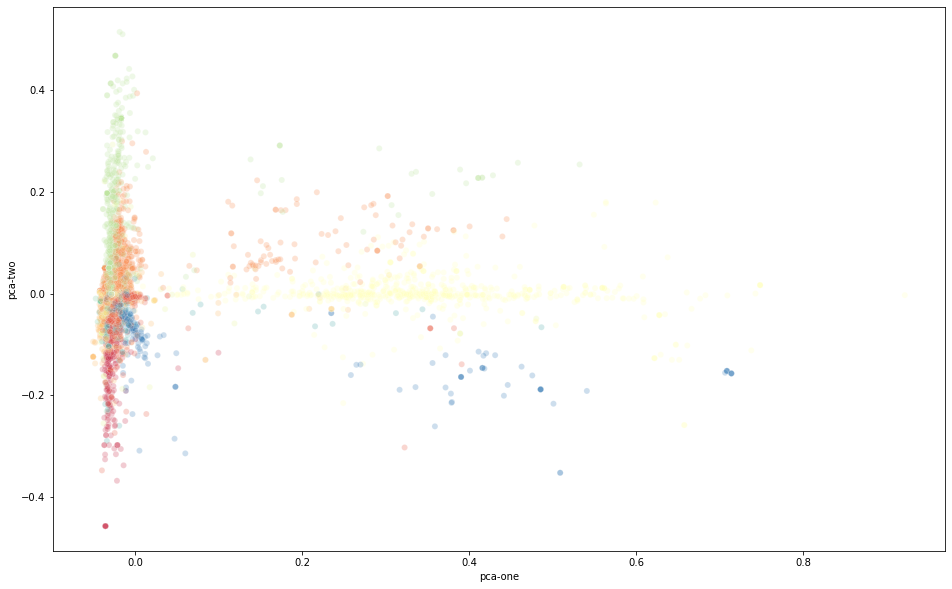

In [164]:
plt.figure(figsize=(16,10))
sns.scatterplot(
    x="pca-one", y="pca-two", hue=df_clean.Topic2,
    data=df_clean,
    legend=False,
    alpha=0.25,
    palette='Spectral'
)

In [165]:
df_clean

,board_num,board_name,pin_num,description,Topic2,pca-one,pca-two,pca-three
0,21181129436808479,Pets,21181060737501522,Pink Elephant Onesie– Little Beast,colours,-0.031663,-0.129462,0.165061
1,21181129436808479,Pets,21181060737450032,Dog Leash Isabel Pink Yellow Handmade Leather ...,colours,-0.027330,-0.104244,0.130174
2,21181129436808479,Pets,21181060737450029,Dog Knit Feather Christian Cowan and maxbone J...,wedding,-0.025299,-0.004336,-0.016149
3,21181129436808479,Pets,21181060737450028,Dog Knit Feather Christian Cowan and maxbone J...,wedding,-0.025299,-0.004336,-0.016149
4,21181129436808479,Pets,21181060737421438,"While you’re bundling up, remember to keep you...",diy party,-0.022275,-0.001945,-0.013536
...,...,...,...,...,...,...,...,...
10912,21181129436631398,Mini Bites,21181060734534261,,misc,-0.028119,-0.001157,-0.013845
10913,21181129436631398,Mini Bites,21181060734284947,DIY Bunny Ear Ice Cream Cones | via Studio DIY,diy party,-0.018818,0.165232,0.072283
10914,21181129436631398,Mini Bites,21181060732831293,We’ve partnered with Popsicle to share an easy...,diy party,-0.022533,0.010011,-0.014165
10915,21181129436631398,Mini Bites,21181060727198274,20 Easy After-School Snacks Your Kids Will Go ...,diy party,-0.019490,0.016680,-0.013555


In [92]:
### 3D ####

In [166]:
rndperm = np.random.permutation(df.shape[0])

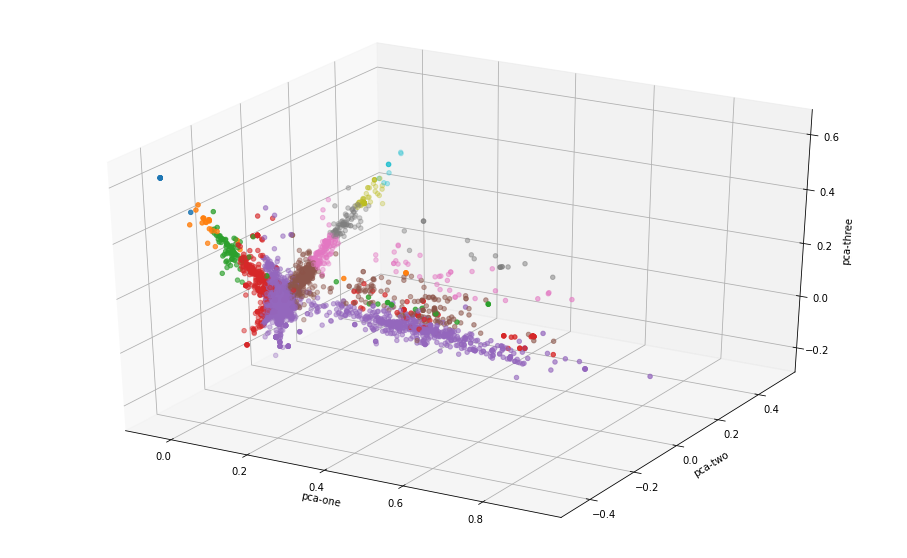

In [167]:
ax = plt.figure(figsize=(16,10)).gca(projection='3d')
ax.scatter(
    xs=df_clean.loc[rndperm,:]["pca-one"], 
    ys=df_clean.loc[rndperm,:]["pca-two"], 
    zs=df_clean.loc[rndperm,:]["pca-three"], 
    c=df_clean.loc[rndperm,:]["pca-two"], 
    cmap='tab10'
)
ax.set_xlabel('pca-one')
ax.set_ylabel('pca-two')
ax.set_zlabel('pca-three')
plt.show()


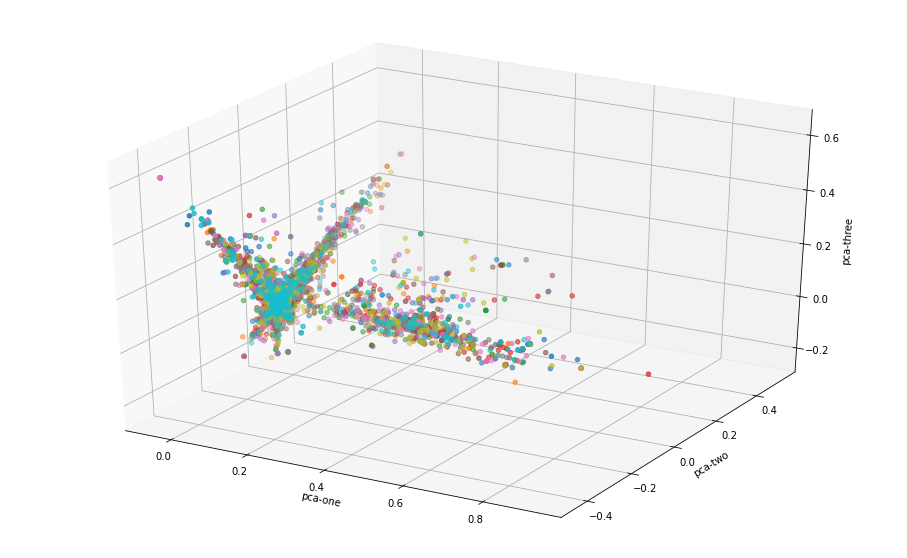

In [151]:
ax = plt.figure(figsize=(16,10)).gca(projection='3d')
ax.scatter(
    xs=df_clean.loc[rndperm,:]["pca-one"], 
    ys=df_clean.loc[rndperm,:]["pca-two"], 
    zs=df_clean.loc[rndperm,:]["pca-three"], 
    c=range(0,10917), 
    cmap='tab10',
)
ax.set_xlabel('pca-one')
ax.set_ylabel('pca-two')
ax.set_zlabel('pca-three')
plt.show()


In [168]:
##### LDA ####

In [169]:
df = pd.read_csv('../4-9-clustering-project-main/ohjoypins.csv')
df

,board_num,board_name,pin_num,description
0,21181129436808479,Pets,21181060737501522,Pink Elephant Onesie– Little Beast
1,21181129436808479,Pets,21181060737450032,Dog Leash Isabel Pink Yellow Handmade Leather ...
2,21181129436808479,Pets,21181060737450029,Dog Knit Feather Christian Cowan and maxbone J...
3,21181129436808479,Pets,21181060737450028,Dog Knit Feather Christian Cowan and maxbone J...
4,21181129436808479,Pets,21181060737421438,"While you’re bundling up, remember to keep you..."
...,...,...,...,...
10912,21181129436631398,Mini Bites,21181060734534261,
10913,21181129436631398,Mini Bites,21181060734284947,DIY Bunny Ear Ice Cream Cones | via Studio DIY
10914,21181129436631398,Mini Bites,21181060732831293,We’ve partnered with Popsicle to share an easy...
10915,21181129436631398,Mini Bites,21181060727198274,20 Easy After-School Snacks Your Kids Will Go ...


In [171]:
df_desc = df[['description']]
df_desc['index'] = df_desc.index
documents = df_desc

<ipython-input-171-df9314fb9d60>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_desc['index'] = df_desc.index


In [176]:
documents.drop(documents.description[documents['description'] == ' '].index, axis=0,inplace=True)


/opt/anaconda3/lib/python3.8/site-packages/pandas/core/frame.py:3990: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [177]:
documents

,description,index
0,Pink Elephant Onesie– Little Beast,0
1,Dog Leash Isabel Pink Yellow Handmade Leather ...,1
2,Dog Knit Feather Christian Cowan and maxbone J...,2
3,Dog Knit Feather Christian Cowan and maxbone J...,3
4,"While you’re bundling up, remember to keep you...",4
...,...,...
10911,Takenaka Cube Bento Box,10911
10913,DIY Bunny Ear Ice Cream Cones | via Studio DIY,10913
10914,We’ve partnered with Popsicle to share an easy...,10914
10915,20 Easy After-School Snacks Your Kids Will Go ...,10915


In [187]:
import gensim
from gensim.utils import simple_preprocess
from gensim.parsing.preprocessing import STOPWORDS
from nltk.stem import WordNetLemmatizer, SnowballStemmer
from nltk.stem.porter import *
from nltk.stem.porter import StemmerI
import numpy as np
#np.random.seed(2018)
import nltk
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /Users/Main/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [189]:
stemmer = SnowballStemmer('english')
def lemmatize_stemming(text):
    return stemmer.stem(WordNetLemmatizer().lemmatize(text, pos='v'))
def preprocess(text):
    result = []
    for token in gensim.utils.simple_preprocess(text):
        if token not in gensim.parsing.preprocessing.STOPWORDS and len(token) > 3:
            result.append(lemmatize_stemming(token))
    return result

In [190]:
doc_sample = documents[documents['index'] == 4310].values[0][0]
print('original document: ')
words = []
for word in doc_sample.split(' '):
    words.append(word)
print(words)
print('\n\n tokenized and lemmatized document: ')
print(preprocess(doc_sample))

original document: 
['DIY', 'Fingerprint', 'Art', 'Pumpkins', '|', 'Handmade', 'Charlotte']


 tokenized and lemmatized document: 
['fingerprint', 'pumpkin', 'handmad', 'charlott']


In [191]:
processed_docs = documents['description'].map(preprocess)
processed_docs[:10]

0                   [pink, eleph, onesi, littl, beast]
1    [leash, isabel, pink, yellow, handmad, leather...
2    [knit, feather, christian, cowan, maxbon, jump...
3    [knit, feather, christian, cowan, maxbon, jump...
4    [bundl, rememb, warm, outerwear, option, safe,...
5    [basic, concept, fortun, cooki, nose, work, ba...
6                                   [boba, trill, paw]
7               [spearmint, climb, rope, leash, foggi]
8             [modern, hous, acryl, door, petso, etsi]
9                [porvoo, medium, hous, crate, barrel]
Name: description, dtype: object

In [192]:
dictionary = gensim.corpora.Dictionary(processed_docs)
count = 0
for k, v in dictionary.iteritems():
    print(k, v)
    count += 1
    if count > 10:
        break

0 beast
1 eleph
2 littl
3 onesi
4 pink
5 bone
6 handmad
7 isabel
8 leash
9 leather
10 maxbon


In [193]:
dictionary.filter_extremes(no_below=15, no_above=0.5, keep_n=100000)

In [194]:
bow_corpus = [dictionary.doc2bow(doc) for doc in processed_docs]
bow_corpus[4310]

[(21, 1)]

In [195]:
bow_doc_4310 = bow_corpus[4310]
for i in range(len(bow_doc_4310)):
    print("Word {} (\"{}\") appears {} time.".format(bow_doc_4310[i][0], 
                                               dictionary[bow_doc_4310[i][0]], 
bow_doc_4310[i][1]))

Word 21 ("glitter") appears 1 time.


In [196]:
from gensim import corpora, models
tfidf = models.TfidfModel(bow_corpus)
corpus_tfidf = tfidf[bow_corpus]
from pprint import pprint
for doc in corpus_tfidf:
    pprint(doc)
    break

[(0, 0.7899554388748654), (1, 0.6131642558010202)]


In [197]:
lda_model = gensim.models.LdaMulticore(bow_corpus, num_topics=10, id2word=dictionary, passes=2, workers=2)

In [198]:
for idx, topic in lda_model.print_topics(-1):
    print('Topic: {} \nWords: {}'.format(idx, topic))

Topic: 0 
Words: 0.036*"dress" + 0.035*"gift" + 0.032*"wrap" + 0.026*"christma" + 0.025*"vintag" + 0.025*"cream" + 0.022*"style" + 0.020*"pink" + 0.018*"happi" + 0.016*"fashion"
Topic: 1 
Words: 0.051*"paper" + 0.039*"wrap" + 0.033*"color" + 0.031*"dress" + 0.028*"gift" + 0.022*"tape" + 0.018*"look" + 0.016*"white" + 0.013*"design" + 0.011*"gold"
Topic: 2 
Words: 0.029*"photo" + 0.022*"pink" + 0.018*"inspir" + 0.018*"fall" + 0.016*"green" + 0.014*"fabric" + 0.014*"glitter" + 0.013*"bowl" + 0.012*"wear" + 0.012*"photographi"
Topic: 3 
Words: 0.019*"color" + 0.019*"collect" + 0.016*"wear" + 0.016*"spring" + 0.016*"rise" + 0.016*"design" + 0.014*"free" + 0.014*"summer" + 0.012*"women" + 0.012*"studio"
Topic: 4 
Words: 0.046*"cake" + 0.020*"guid" + 0.016*"shop" + 0.014*"photographi" + 0.014*"collect" + 0.013*"perfect" + 0.011*"salt" + 0.011*"hair" + 0.011*"love" + 0.010*"illustr"
Topic: 5 
Words: 0.072*"gift" + 0.061*"wrap" + 0.023*"holiday" + 0.018*"paper" + 0.016*"collect" + 0.016*"prett

In [199]:
lda_model_tfidf = gensim.models.LdaMulticore(corpus_tfidf, num_topics=10, id2word=dictionary, passes=2, workers=4)
for idx, topic in lda_model_tfidf.print_topics(-1):
    print('Topic: {} Word: {}'.format(idx, topic))

Topic: 0 Word: 0.029*"paper" + 0.022*"wrap" + 0.022*"print" + 0.016*"cake" + 0.013*"food" + 0.012*"etsi" + 0.011*"super" + 0.011*"coat" + 0.011*"think" + 0.009*"kind"
Topic: 1 Word: 0.022*"thing" + 0.022*"pinterest" + 0.017*"floral" + 0.016*"heart" + 0.015*"parti" + 0.014*"dress" + 0.012*"poster" + 0.012*"flower" + 0.010*"pink" + 0.010*"love"
Topic: 2 Word: 0.039*"dress" + 0.023*"chocol" + 0.021*"vintag" + 0.020*"wrap" + 0.019*"ceram" + 0.018*"glitter" + 0.014*"color" + 0.014*"confetti" + 0.013*"pink" + 0.013*"wed"
Topic: 3 Word: 0.045*"gift" + 0.028*"wed" + 0.026*"design" + 0.025*"wrap" + 0.021*"guid" + 0.018*"paper" + 0.014*"modern" + 0.013*"cute" + 0.012*"creativ" + 0.012*"festiv"
Topic: 4 Word: 0.031*"cake" + 0.027*"fall" + 0.022*"instagram" + 0.019*"color" + 0.018*"imag" + 0.017*"cream" + 0.013*"photo" + 0.013*"bhldn" + 0.013*"vintag" + 0.013*"pinterest"
Topic: 5 Word: 0.028*"gift" + 0.026*"travel" + 0.023*"vintag" + 0.022*"happi" + 0.020*"topper" + 0.017*"collect" + 0.017*"wrap" 

In [200]:
processed_docs[4310]


['fingerprint', 'pumpkin', 'handmad', 'charlott']

In [201]:
for index, score in sorted(lda_model[bow_corpus[4310]], key=lambda tup: -1*tup[1]):
    print("\nScore: {}\t \nTopic: {}".format(score, lda_model.print_topic(index, 10)))


Score: 0.54998379945755	 
Topic: 0.029*"photo" + 0.022*"pink" + 0.018*"inspir" + 0.018*"fall" + 0.016*"green" + 0.014*"fabric" + 0.014*"glitter" + 0.013*"bowl" + 0.012*"wear" + 0.012*"photographi"

Score: 0.050003498792648315	 
Topic: 0.040*"print" + 0.036*"wrap" + 0.035*"gift" + 0.022*"wed" + 0.018*"pinterest" + 0.018*"idea" + 0.017*"rainbow" + 0.014*"cute" + 0.013*"fashion" + 0.012*"floral"

Score: 0.050002824515104294	 
Topic: 0.046*"cake" + 0.020*"guid" + 0.016*"shop" + 0.014*"photographi" + 0.014*"collect" + 0.013*"perfect" + 0.011*"salt" + 0.011*"hair" + 0.011*"love" + 0.010*"illustr"

Score: 0.05000258609652519	 
Topic: 0.072*"gift" + 0.061*"wrap" + 0.023*"holiday" + 0.018*"paper" + 0.016*"collect" + 0.016*"pretti" + 0.016*"summer" + 0.014*"brit" + 0.013*"station" + 0.013*"have"

Score: 0.050002362579107285	 
Topic: 0.051*"paper" + 0.039*"wrap" + 0.033*"color" + 0.031*"dress" + 0.028*"gift" + 0.022*"tape" + 0.018*"look" + 0.016*"white" + 0.013*"design" + 0.011*"gold"

Score: 0.

In [202]:
for index, score in sorted(lda_model_tfidf[bow_corpus[4310]], key=lambda tup: -1*tup[1]):
    print("\nScore: {}\t \nTopic: {}".format(score, lda_model_tfidf.print_topic(index, 10)))


Score: 0.5499885082244873	 
Topic: 0.039*"dress" + 0.023*"chocol" + 0.021*"vintag" + 0.020*"wrap" + 0.019*"ceram" + 0.018*"glitter" + 0.014*"color" + 0.014*"confetti" + 0.013*"pink" + 0.013*"wed"

Score: 0.05000244826078415	 
Topic: 0.045*"gift" + 0.028*"wed" + 0.026*"design" + 0.025*"wrap" + 0.021*"guid" + 0.018*"paper" + 0.014*"modern" + 0.013*"cute" + 0.012*"creativ" + 0.012*"festiv"

Score: 0.05000237375497818	 
Topic: 0.022*"thing" + 0.022*"pinterest" + 0.017*"floral" + 0.016*"heart" + 0.015*"parti" + 0.014*"dress" + 0.012*"poster" + 0.012*"flower" + 0.010*"pink" + 0.010*"love"

Score: 0.05000218749046326	 
Topic: 0.028*"gift" + 0.026*"travel" + 0.023*"vintag" + 0.022*"happi" + 0.020*"topper" + 0.017*"collect" + 0.017*"wrap" + 0.016*"white" + 0.015*"spring" + 0.015*"hous"

Score: 0.050001513212919235	 
Topic: 0.047*"wrap" + 0.034*"gift" + 0.034*"christma" + 0.025*"gorgeous" + 0.023*"love" + 0.020*"tip" + 0.019*"designlovefest" + 0.016*"style" + 0.015*"idea" + 0.015*"time"

Score:

In [204]:
### TESTING ON UNSEEN DOC?###

In [206]:
unseen_document = 'How a Pentagon deal became an identity crisis for Google'
bow_vector = dictionary.doc2bow(preprocess(unseen_document))
for index, score in sorted(lda_model[bow_vector], key=lambda tup: -1*tup[1]):
    print("Score: {}\t Topic: {}".format(score, lda_model.print_topic(index, 5)))

Score: 0.5499531030654907	 Topic: 0.072*"gift" + 0.061*"wrap" + 0.023*"holiday" + 0.018*"paper" + 0.016*"collect"
Score: 0.05001739785075188	 Topic: 0.049*"design" + 0.028*"chocol" + 0.019*"paint" + 0.019*"pattern" + 0.018*"love"
Score: 0.050005704164505005	 Topic: 0.040*"print" + 0.036*"wrap" + 0.035*"gift" + 0.022*"wed" + 0.018*"pinterest"
Score: 0.05000518634915352	 Topic: 0.047*"design" + 0.029*"inspir" + 0.023*"modern" + 0.020*"parti" + 0.020*"wed"
Score: 0.050003938376903534	 Topic: 0.029*"photo" + 0.022*"pink" + 0.018*"inspir" + 0.018*"fall" + 0.016*"green"
Score: 0.05000295490026474	 Topic: 0.033*"hous" + 0.026*"instagram" + 0.021*"build" + 0.020*"parti" + 0.018*"home"
Score: 0.05000295117497444	 Topic: 0.051*"paper" + 0.039*"wrap" + 0.033*"color" + 0.031*"dress" + 0.028*"gift"
Score: 0.050002917647361755	 Topic: 0.036*"dress" + 0.035*"gift" + 0.032*"wrap" + 0.026*"christma" + 0.025*"vintag"
Score: 0.050002917647361755	 Topic: 0.019*"color" + 0.019*"collect" + 0.016*"wear" + 0.

In [12]:
df.board_name.unique()

array(['Pets', 'Make with Kids', 'For the Home', 'Recipes', 'Hair',
       'Oh Baby', 'Oh Joy! Builds a House', 'Accessorize', 'A-door-able',
       'Architecture', 'Artists I Love', 'Baby Essentials for Registry',
       'Baubles', 'Balloons', 'Beauty', 'Chic Gadgets', 'Color',
       'Cute Overload', 'Dream Homes', 'Dressing the Bump',
       'Graphic Design', 'Green House', 'Edible Gifts', 'Fabrics I Love',
       'Floored', 'Florals', 'Fonts', 'Holiday', 'Illustrations', 'Japan',
       'Joy Rides', 'LA Eats', "Joy's Wishlist", 'Lots of Love',
       'Lovely Ladies', 'Make It', 'Metallics', 'Mini Me', 'Mini Travels',
       'Oh Joy for Target', 'NY Eats', 'Oh Joy Wears',
       'Oh Joy Studio Inspiration', 'Outdoor Living', 'Outfitted',
       'Parties', 'Packaging', 'Pattern', 'Photography', 'Prints I Love',
       'Retail Inspiration', 'Said It', 'Stationery and Office',
       'Styled Life', 'Stylish Gents', 'Tabletop', 'Tasty Treats',
       'Texture', 'Travel', 'Typography', '

In [49]:
#### CLUSTERING ####

In [50]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.metrics import fowlkes_mallows_score
from sklearn.decomposition import PCA
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import Normalizer,StandardScaler

In [51]:
###TFIDF###

In [52]:
#COMPRESSED_SIZE = 7

tfidf = TfidfVectorizer(stop_words='english')
#scaler = StandardScaler(with_mean=False)

X = tfidf.fit_transform(df['description'])

#X = scaler.fit_transform(X)

In [26]:
Xd = X.toarray()
Xd = PCA(COMPRESSED_SIZE).fit(Xd.T).components_.T

PCA_df = pd.DataFrame(Xd)
PCA_df

,0,1,2,3,4,5,6
0,-1.773037e-01,-3.150987e-01,8.271702e-01,1.445679e-01,1.479458e-02,4.049036e-01,0.000000e+00
1,-1.477753e-01,6.465084e-01,8.385255e-15,-4.456559e-01,9.260226e-02,5.941423e-01,8.744551e-16
2,-2.609840e-01,-4.638127e-01,-5.619515e-01,2.127982e-01,2.177703e-02,5.960020e-01,-6.409224e-16
3,-2.775558e-17,6.661338e-16,3.608225e-16,-7.771561e-16,1.165734e-15,-1.040834e-17,-1.000000e+00
4,2.289923e-01,4.716803e-01,-2.225295e-14,8.345139e-01,2.307395e-03,1.692969e-01,-3.628537e-16
5,6.534776e-01,-1.786310e-01,3.946244e-15,-1.130995e-01,7.086200e-01,1.616297e-01,9.243092e-16
6,6.317774e-01,-1.150052e-01,4.738182e-15,-1.612543e-01,-6.989879e-01,2.702666e-01,-8.843799e-16


In [29]:
import warnings; warnings.simplefilter('ignore')  # Fix NumPy issues...
from sklearn.cluster import MiniBatchKMeans

inertias = []
K = [1,2,3,4,5,6,7]

for k in K:
    k_model = MiniBatchKMeans(n_clusters=k)
    k_model.fit(PCA_df)
    inertias.append(k_model.inertia_)

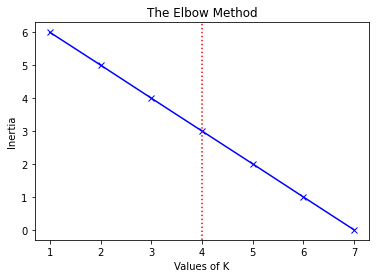

In [30]:
plt.plot(K,inertias,'bx-')
plt.xlabel('Values of K')
plt.ylabel('Inertia')
plt.title('The Elbow Method')
plt.axvline(x=4,linestyle=':',color='r') #Can see at 128 is where the elbow is
plt.show()


In [18]:
from sklearn.metrics import silhouette_samples, silhouette_score


k_cluster = KMeans(n_clusters=3)
k_cluster.fit(X)
preds = k_cluster.predict(X)

silhouette_score(X,preds)

0.2630220570052866

In [19]:
k_cluster.labels_

array([1, 0, 2, 1, 1, 1, 1], dtype=int32)

In [175]:
len(Xd)

7

In [14]:
# Preprocessing
from sklearn.feature_extraction.text import TfidfVectorizer
# remove frequent words (max_df=0.95) and very rare words that only show up like once (min_df=2)
tfidf = TfidfVectorizer(max_df=0.95, min_df=2, stop_words='english')
dtm = tfidf.fit_transform(df.description)
# NMF
from sklearn.decomposition import NMF
# n_components is the arbitrary number of expected topics
nmf_model = NMF(n_components=12,random_state=42)
nmf_model.fit(dtm)
# Get top words by components (topics)
for index,topic in enumerate(nmf_model.components_):
    print(f'THE TOP 15 WORDS FOR TOPIC #{index}')
    print([tfidf.get_feature_names()[i] for i in topic.argsort()[-15:]])
    print('\n')
# Reasign topics to the dataset
topic_results = nmf_model.transform(dtm)
df['Topic2'] = topic_results.argmax(axis=1)
# each topic is just based on what the top 15 words were from above
#mytopic_dict2 = {0:'quilt',1:'home design',2:'royalty',3:'funny',4:'octopus',5:'diy',6:'remodeling',
                 #7:'books',8:'recipes',9:'arts',10:'bedroom decor',11:'yard'}

#df['Topic2'] = df['Topic2'].map(mytopic_dict2)
df.head(10)

THE TOP 15 WORDS FOR TOPIC #0
['new', 'fall', 'petco', 'day', 'guide', 'baby', 'adventures', 'shop', 'wears', 'builds', 'house', 'collection', 'target', 'joy', 'oh']


THE TOP 15 WORDS FOR TOPIC #1
['flowers', 'door', 'light', 'walls', 'rose', 'orange', 'balloons', 'blue', 'black', 'red', 'green', 'pretty', 'white', 'gold', 'pink']


THE TOP 15 WORDS FOR TOPIC #2
['christmas', 'haves', 'make', 'giftwrap', 'station', 'ultimate', 'brit', 'gifts', 'guide', 'ideas', 'holiday', 'paper', 'wrap', 'wrapping', 'gift']


THE TOP 15 WORDS FOR TOPIC #3
['decor', 'illustration', 'pattern', 'com', 'floral', 'architecture', 'ideas', 'modern', 'graphic', 'packaging', 'studio', 'home', 'interior', 'inspiration', 'design']


THE TOP 15 WORDS FOR TOPIC #4
['charlotte', 'need', 'ceramic', 'leather', 'party', 'style', 'live', 'cats', 'little', 'yellow', 'designlovefest', 'hand', 'drawn', 'colors', 'love']


THE TOP 15 WORDS FOR TOPIC #5
['week', 'spring', 'fashion', 'builds', 'bio', 'little', 'kendraalexan

,board_num,board_name,pin_num,description,Topic2
0,21181129436808479,Pets,21181060737501522,Pink Elephant Onesie– Little Beast,1
1,21181129436808479,Pets,21181060737450032,Dog Leash Isabel Pink Yellow Handmade Leather ...,1
2,21181129436808479,Pets,21181060737450029,Dog Knit Feather Christian Cowan and maxbone J...,8
3,21181129436808479,Pets,21181060737450028,Dog Knit Feather Christian Cowan and maxbone J...,8
4,21181129436808479,Pets,21181060737421438,"While you’re bundling up, remember to keep you...",10
5,21181129436808479,Pets,21181060737402957,The Basic Concept | Fortune Cookie Nose-work T...,3
6,21181129436808479,Pets,21181060737402228,Boba Tag | TRILL PAWS - Pet tag,5
7,21181129436808479,Pets,21181060737393744,Spearmint Climbing Rope Dog Leash – The Foggy Dog,0
8,21181129436808479,Pets,21181060737384733,Modern dog and cat house with acrylic door Pet...,5
9,21181129436808479,Pets,21181060737384718,Porvoo Medium Pet House | Crate and Barrel,5


In [77]:
df.Topic2.unique()

array(['quilt', 'recipes', 'home design', 'diy', 'yard', 'royalty',
       'books', 'funny', 'bedroom decor', 'octopus', 'arts', 'remodeling'],
      dtype=object)

In [125]:
import gensim
from gensim.utils import simple_preprocess
from gensim.parsing.preprocessing import STOPWORDS
from nltk.stem import WordNetLemmatizer, SnowballStemmer
from nltk.stem.porter import *
import numpy as np

In [126]:
import nltk
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /Users/Main/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [127]:
#######

In [163]:
new_df = df.drop(df.description[df['description'] == ' '].index, axis=0)

In [164]:
new_df

,board_num,board_name,pin_num,description,Topic2
14,303289424845540062,Memories of my Montreal,303289356162550567,Hudson’s Bay Closes 2nd-Oldest Suburban Store,recipes
15,303289424845540062,Memories of my Montreal,303289356162550566,Hudson’s Bay Closes 2nd-Oldest Suburban Store,recipes
41,303289424845531073,Laundry room,303289356162099906,Stuck with a tiny laundry room? Make the most ...,home design
58,303289424845512527,I DONT LIKE,303289356160661165,Animals smoking cigarettes pictured around the...,recipes
62,303289424845498500,MASKS,303289356162210076,How to make face mask | Face mask diy | 3D FAC...,diy
...,...,...,...,...,...
1991,619245086202741070,PORC,619245017496099664,Instant Pot Pork Chops are juicy and full of f...,recipes
1992,619245086202741070,PORC,619245017496099486,Instant Pot Smothered Pork Chops Recipe - sauc...,recipes
1993,619245086202741070,PORC,619245017496099261,Instant Pot Pork Chops with Gravy are one of t...,recipes
1994,619245086202741070,PORC,619245017496068006,Best Damn Instant Pot Pulled Pork - RecipeTeacher,recipes


In [165]:
def lemmatize_stemming(text):
    return stemmer.stem(WordNetLemmatizer().lemmatize(text, pos='v'))
# Tokenize and lemmatize
def preprocess(text):
    result=[]
    for token in gensim.utils.simple_preprocess(text) :
        if token not in gensim.parsing.preprocessing.STOPWORDS and len(token) > 3:
            result.append(lemmatize_stemming(token))
            
    return result

In [180]:
text = new_df.description

In [176]:
text = list(text)

In [181]:
preprocess(text)

TypeError: decoding to str: need a bytes-like object, Series found

description
Hudson’s Bay Closes 2nd-Oldest Suburban Store                                                                                                                                                                                                                     NaN
Hudson’s Bay Closes 2nd-Oldest Suburban Store                                                                                                                                                                                                                     NaN
Stuck with a tiny laundry room? Make the most of it with these super clever space-saving ideas.                                                                                                                                                                   NaN
Animals smoking cigarettes pictured around the world                                                                                                                                                      

In [167]:
text

0                                                        
1                                                        
2                                                        
3                                                        
4                                                        
                              ...                        
1991    Instant Pot Pork Chops are juicy and full of f...
1992    Instant Pot Smothered Pork Chops Recipe - sauc...
1993    Instant Pot Pork Chops with Gravy are one of t...
1994    Best Damn Instant Pot Pulled Pork - RecipeTeacher
1995    Crock Pot Pork Chops - these chops literally m...
Name: description, Length: 1996, dtype: object

In [16]:
from sklearn.decomposition import PCA

In [41]:
# Preprocessing
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import PCA
#remove empty pin descriptions
df_clean = df.drop(df.description[df['description'] == ''].index, axis=0)
# remove frequent words (max_df=0.95) and very rare words that only show up like once (min_df=2)
tfidf = TfidfVectorizer(max_df=0.95, min_df=2, stop_words='english')
dtm = tfidf.fit_transform(df_clean.description)
# lets try TSNE on this data
# fit transform the TSNE model
pca = PCA(n_components=7)
pca_result = pca.fit_transform(dtm.todense())
df['pca-one'] = pca_result[:,0]
df['pca-two'] = pca_result[:,1] 
df['pca-three'] = pca_result[:,2]
print('Explained variation per principal component: {}'.format(pca.explained_variance_ratio_))

Explained variation per principal component: [0.01287882 0.00433917 0.00408896 0.00398524 0.00391588 0.00369637
 0.00359089]


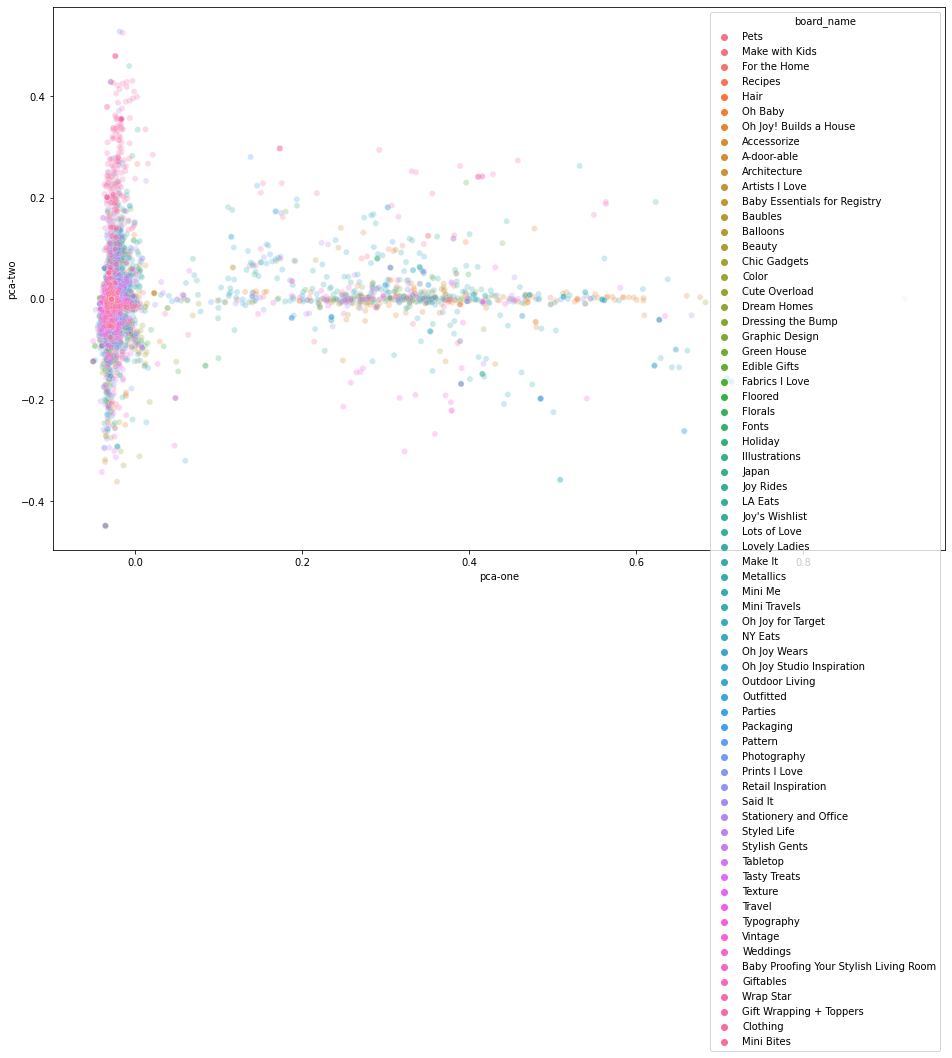

In [50]:
plt.figure(figsize=(16,10))
sns.scatterplot(
    x="pca-one", y="pca-two", hue=df.board_name,
    data=df,
    legend=True,
    alpha=0.25
)


In [43]:
plt.figure(figsize=(16,10))
sns.scatterplot(
    x="pca-one", y="pca-two", hue=df.Topic2,
    data=df,
    legend=False,
    alpha=0.25
)

AttributeError: 'DataFrame' object has no attribute 'Topic2'

<Figure size 1152x720 with 0 Axes>

[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 10917 samples in 0.001s...
[t-SNE] Computed neighbors for 10917 samples in 2.700s...
[t-SNE] Computed conditional probabilities for sample 1000 / 10917
[t-SNE] Computed conditional probabilities for sample 2000 / 10917
[t-SNE] Computed conditional probabilities for sample 3000 / 10917
[t-SNE] Computed conditional probabilities for sample 4000 / 10917
[t-SNE] Computed conditional probabilities for sample 5000 / 10917
[t-SNE] Computed conditional probabilities for sample 6000 / 10917
[t-SNE] Computed conditional probabilities for sample 7000 / 10917
[t-SNE] Computed conditional probabilities for sample 8000 / 10917
[t-SNE] Computed conditional probabilities for sample 9000 / 10917
[t-SNE] Computed conditional probabilities for sample 10000 / 10917
[t-SNE] Computed conditional probabilities for sample 10917 / 10917
[t-SNE] Mean sigma: 0.000000
[t-SNE] KL divergence after 250 iterations with early exaggeration: 87.065353
[t-SNE] KL

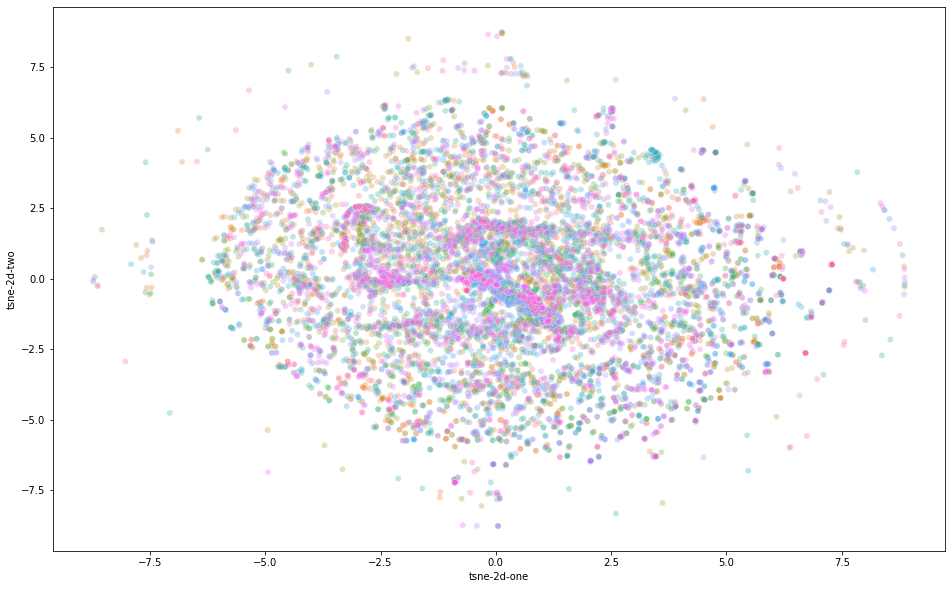

In [53]:
# Preprocessing
from sklearn.feature_extraction.text import TfidfVectorizer
#remove empty pin descriptions
df_clean = df.drop(df.description[df['description'] == ''].index, axis=0)
# remove frequent words (max_df=0.95) and very rare words that only show up like once (min_df=2)
tfidf = TfidfVectorizer(max_df=0.95, min_df=2, stop_words='english')
dtm = tfidf.fit_transform(df_clean.description)


# lets try TSNE on this data
# fit transform the TSNE model
import time
from sklearn.manifold import TSNE
time_start = time.time()
tsne = TSNE(n_components=2, verbose=1, perplexity=40, n_iter=300)
tsne_results = tsne.fit_transform(dtm)
print('t-SNE done! Time elapsed: {} seconds'.format(time.time()-time_start))



# plot it
import matplotlib.pyplot as plt 
import seaborn as sns
df_subset = df_clean.copy()
df_subset['tsne-2d-one'] = tsne_results[:,0]
df_subset['tsne-2d-two'] = tsne_results[:,1]
plt.figure(figsize=(16,10)) #.gca(projection=‘3d’)
sns.scatterplot(
    x='tsne-2d-one', y='tsne-2d-two',
    hue=df_clean.board_name, # clusters from the topics we got from NMF 
    # palette=sns.color_palette(“hls”, 10),
    data=df_subset,
    legend=False,
    alpha=0.3,
    
)

In [ ]:
##GENSIM###

In [91]:
import gensim
import gensim.downloader as model_api

In [92]:
word_vectors = model_api.load("glove-wiki-gigaword-50")

In [93]:
import re

replaceDict = dict({
'{':" ", '}':" ", ',':"", '.':" ", '!':" ", '\\':" ", '/':" ", '$':" ", '%':" ",
'^':" ", '?':" ", '\'':" ", '"':" ", '(':" ", ')':" ", '*':" ", '+':" ", '-':" ",
'=':" ", ':':" ", ';':" ", ']':" ", '[':" ", '`':" ", '~':" ",
})

rep = dict((re.escape(k), v) for k, v in replaceDict.items())
pattern = re.compile("|".join(rep.keys()))
def replacer(text):
    return rep[re.escape(text.group(0))]

words = df.description.str.replace(pattern, replacer).str.lower().str.split()
words = pd.DataFrame(words.tolist())
words

,0,1,2,3,4,5,6,7,8,9,...,21,22,23,24,25,26,27,28,29,30
0,diane’s,no,fail,french,bread,|,a,bountiful,kitchen,None,...,None,None,None,None,None,None,None,None,None,None
1,this,instant,pot,pulled,pork,is,so,easy,and,perfect,...,don,t,have,an,instant,pot,use,a,pressure,cooker
2,check,out,more,tips,here,benefits,detox,water,helps,with,...,None,None,None,None,None,None,None,None,None,None
3,None,None,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
4,quick,and,easy,crocheted,dishcloth,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
5,beginner,dishcloth,free,crochet,pattern,more,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
6,easy,crochet,dishcloth,|,free,crochet,pattern,written,instructions,and,...,None,None,None,None,None,None,None,None,None,None


In [94]:
def soft_get(w):
    try:
        return word_vectors[w]
    except KeyError:
        return np.zeros(word_vectors.vector_size)

def map_vectors(row):
    try:
        res=row.loc[row.notna()].apply(soft_get)
        if len(res) >=1:
            return np.sum(res)
        else:
            return np.zeros(word_vectors.vector_size)
        # return np.sum(
        #     row.loc[row.notna()].apply(soft_get)
        # )
    except:
        return np.zeros(word_vectors.vector_size)
emb = pd.DataFrame(words.apply(map_vectors, axis=1).tolist())
emb

,0,1,2,3,4,5,6,7,8,9,...,40,41,42,43,44,45,46,47,48,49
0,-0.660187,2.310290,-1.866621,-2.176622,3.185500,0.733234,-2.153770,0.188054,-0.642747,-0.645999,...,2.087240,0.169110,-0.252280,-0.407828,0.292805,3.454070,-1.738737,0.025546,2.359545,-0.059757
1,4.702455,3.620511,-3.712399,-2.060614,9.590483,2.849972,-7.736895,-3.941178,-5.162715,8.844585,...,3.354576,7.471588,-6.296726,12.417597,7.744954,4.993248,-2.455864,-2.751897,0.773635,2.694859
2,9.594069,0.741010,-0.600379,-6.416503,-0.328226,6.180858,-2.171470,-0.829669,4.736909,1.531206,...,-3.417946,2.287367,3.510285,7.872010,6.790173,-1.306530,2.094607,1.177610,-0.712729,1.540672
3,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,-1.403279,-1.611470,-0.133990,0.225330,1.358978,1.311552,-0.302040,0.442900,0.810830,1.552710,...,1.997477,0.274760,0.330110,0.605527,1.345808,-1.010680,2.823230,0.067956,1.484980,0.348886
5,-0.980696,-0.594511,-0.910925,-0.702820,0.865814,1.862622,-0.449284,-1.909570,1.845215,2.528823,...,1.790250,-1.526810,1.179820,3.653130,0.445461,-3.682337,4.930510,0.194750,1.131050,0.537847
6,-6.748025,1.166279,-2.674290,-1.203940,3.350967,5.926263,-1.921486,-4.011060,1.802904,1.674331,...,6.995261,-1.590515,-0.468067,3.361239,-2.963915,-2.837251,6.665236,-1.742419,3.668083,2.850555


In [95]:
from sklearn.preprocessing import Normalizer,StandardScaler

X = emb.to_numpy()
norm = StandardScaler()

X = norm.fit_transform(X.T)

X = X.T

pd.DataFrame(X)

,0,1,2,3,4,5,6,7,8,9,...,40,41,42,43,44,45,46,47,48,49
0,-0.414130,0.492593,-0.782388,-0.877014,0.759747,0.011205,-0.870039,-0.155208,-0.408806,-0.409799,...,0.424509,-0.160991,-0.289618,-0.337099,-0.123234,0.841727,-0.743352,-0.204813,0.507628,-0.230852
1,0.156056,0.087142,-0.379929,-0.274718,0.467400,0.038062,-0.636269,-0.394501,-0.472307,0.419890,...,0.070203,0.332437,-0.544538,0.647473,0.349849,0.174578,-0.299894,-0.318750,-0.094190,0.028182
2,0.857097,-0.173284,-0.329404,-1.006326,-0.297729,0.459844,-0.512259,-0.356091,0.291787,-0.081316,...,-0.657333,0.006692,0.149024,0.656672,0.530760,-0.411591,-0.015743,-0.122469,-0.342480,-0.080214
3,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,-0.882402,-0.983982,-0.263091,-0.087772,0.465358,0.442218,-0.345086,0.018385,0.197905,0.559883,...,0.776894,-0.063654,-0.036647,0.097734,0.458932,-0.690845,1.179795,-0.164557,0.526836,-0.027486
5,-0.628616,-0.463690,-0.598819,-0.509945,0.159965,0.585668,-0.401668,-1.025306,0.578234,0.870179,...,0.554760,-0.861843,0.294066,1.350332,-0.019553,-1.782394,1.895858,-0.126623,0.273238,0.019902
6,-1.329304,0.045029,-0.621893,-0.366564,0.424404,0.871609,-0.491167,-0.854025,0.155580,0.133253,...,1.057242,-0.433693,-0.238778,0.426188,-0.672187,-0.650191,0.999932,-0.460072,0.479472,0.337506


In [128]:
from sklearn.metrics import silhouette_samples, silhouette_score


k_cluster = KMeans(n_clusters=4)
k_cluster.fit(X)
preds = k_cluster.predict(X)

silhouette_score(X,preds)

0.15585575495461299

In [138]:
k_cluster.labels_

array([2, 2, 2, 1, 3, 3, 0], dtype=int32)

In [133]:
X[1]

array([ 0.15605626,  0.08714175, -0.37992876, -0.27471812,  0.46739975,
        0.0380622 , -0.63626948, -0.39450088, -0.47230679,  0.41988974,
       -0.59753187,  0.01007548,  0.01657464,  0.1338387 ,  0.59782026,
        0.21704424,  0.18538216, -0.12891946, -0.35391291, -1.38786076,
        0.08582329, -0.19227446,  0.5297487 ,  0.10261921, -0.03434427,
       -2.75281333, -0.75093876,  0.20306735,  1.00160353, -0.51602733,
        5.71211085,  0.24403573, -1.11782449, -0.01589291, -0.31331875,
        0.05387165, -0.17353564,  0.49058868,  0.02842827, -0.6336141 ,
        0.07020301,  0.33243653, -0.54453773,  0.64747309,  0.34984857,
        0.17457835, -0.29989364, -0.3187495 , -0.09419032,  0.02818226])

In [121]:
data = X

In [123]:
import warnings; warnings.simplefilter('ignore')  # Fix NumPy issues...
from sklearn.cluster import MiniBatchKMeans

inertias = []
K = [1,2,3,4,5,6,7]

for k in K:
    k_model = MiniBatchKMeans(n_clusters=k)
    k_model.fit(data)
    inertias.append(k_model.inertia_)


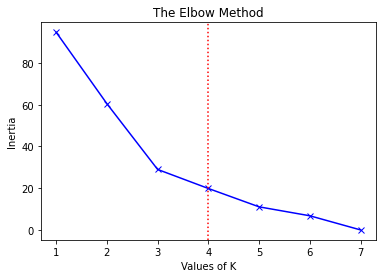

In [126]:
plt.plot(K,inertias,'bx-')
plt.xlabel('Values of K')
plt.ylabel('Inertia')
plt.title('The Elbow Method')
plt.axvline(x=4,linestyle=':',color='r') #Can see at 128 is where the elbow is
plt.show()
